In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [2]:
mdnRnA = np.loadtxt('../mdnRnA.txt', delimiter=',')
startday = pd.datetime(2013, 7, 1)
dates = pd.date_range(startday, periods=len(mdnRnA), freq='W')

In [3]:
DF = pd.DataFrame({'Rn': mdnRnA, 'dates': dates})
test_size = int(0.3*len(mdnRnA))
trainX, testX = DF['Rn'].values[:-test_size], DF['Rn'].values[-test_size:]
traindates, testdates = DF['dates'].values[:-test_size], DF['dates'].values[-test_size:]

In [4]:
model = ARIMA(endog=trainX, order=(4, 0, 2), dates=traindates, freq='W')
results = model.fit()
#print('MSE ARIMA {}: '.format('Rn'), mean_absolute_error(DF['Rn'].values, results.fittedvalues))

In [5]:
pred = results.forecast(test_size)

/usr/local/lib64/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


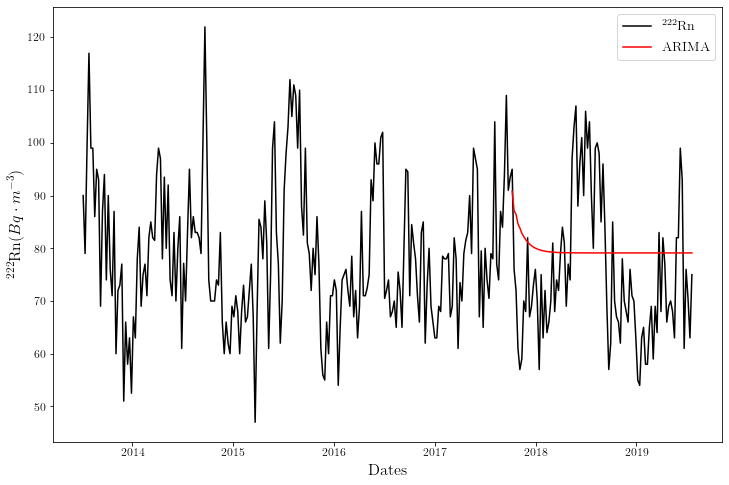

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(DF['dates'].values, DF['Rn'], 'k')
plt.plot(testdates, pred[0], 'r')
plt.ylabel('$^{222}$Rn($Bq \cdot m^{-3}$)', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.legend(['$^{222}$Rn', 'ARIMA'], fontsize=14)